In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from classification_utils import *

In [2]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [3]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619


In [4]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,5148.794751,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.084281,0.365536,0.385427,1.357545,14.574041
std,0.499031,18496.606420,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.109621,0.408358,0.390777,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,53.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.017751,0.136692,0.119116,0.010526,0.104251
50%,1.000000,57.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.045752,0.230747,0.268594,0.043478,0.238606
75%,1.000000,2041.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.088862,0.451218,0.491767,0.949402,24.144412
max,1.000000,399555.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,0.529903,2.183383,1.723913,12.902439,198.461303


In [5]:
#check if there is any null value
data.isnull().values.any()

False

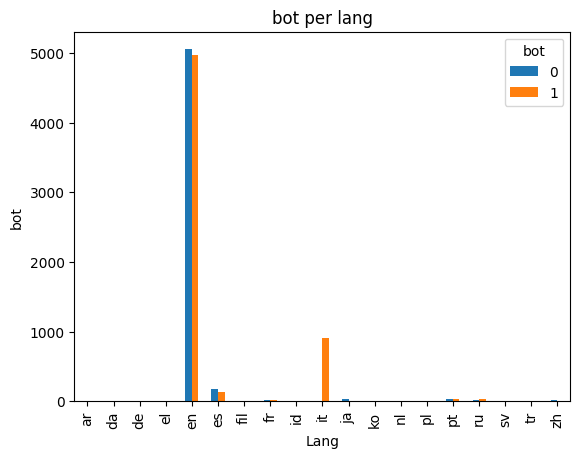

In [6]:
plot_lang_hist(data)

In [7]:
data = discretize_data(data, ["lang"])

In [8]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903,4
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495,4
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008,9
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619,4


In [9]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'lang_num']


In [10]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
2358350287,1551119188,60,74.449275,16.695652,0.0000,0.355072,0.079710,0.0,0.0,0.057971,0.262875,0.319480,0.043478,0.236814,4
2265569552,1546157115,53,84.550268,18.005949,0.0232,0.007733,0.066032,0.0,0.0,0.022606,0.152592,0.156531,0.326591,6.236166,9
2354994642,1550937268,81,60.191781,13.739726,0.0000,0.301370,0.095890,0.0,0.0,0.027397,0.200861,0.163375,0.034247,0.181862,4
2364784555,1551483115,56,61.890756,14.025210,0.0000,0.243697,0.016807,0.0,0.0,0.033613,0.222014,0.192920,0.016807,0.128547,4
228148311,1450647262,53,35.300000,14.694444,0.2000,0.100000,0.000000,0.0,0.3,0.100000,0.300000,0.468996,0.000000,0.000000,5


In [11]:
train_label.head()

2358350287    0
2265569552    1
2354994642    1
2364784555    1
228148311     1
Name: bot, dtype: int64

### Usage of Lang

In [12]:
# To use GaussianNB we have to have gaussian distributed data, so apply standard scaler

scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

In [13]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_X, train_label)

#predict on the test set
train_pred_gnb = gnb.predict(train_X)
test_pred_gnb = gnb.predict(test_X)

In [14]:
print_metrics(train_label, train_pred_gnb, test_label, test_pred_gnb)

Accuracy train set  0.8450651769087524
Accuracy test set  0.8360845641471184
Precision train set  0.8590742265906871
Recall train set  0.8450651769087524
F1 score train set  0.84228557486974
Support train set  (array([0.93047035, 0.79613357]), array([0.72337043, 0.95234758]), array([0.81395349, 0.86726228]), array([3774, 4281]))


In [15]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.94      0.70      0.80      1618
         >50       0.78      0.96      0.86      1835

    accuracy                           0.84      3453
   macro avg       0.86      0.83      0.83      3453
weighted avg       0.86      0.84      0.83      3453



In [16]:
# cross validation
scores = cross_validate(gnb, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.003963788350423177
Score time  0.0010623931884765625
Test score  0.8439478584729981
Train score  0.8452513966480447


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


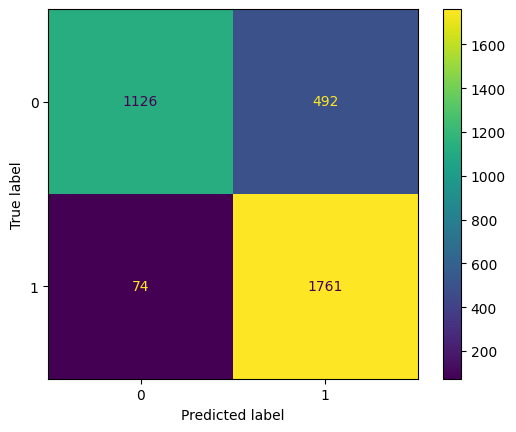

In [17]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred_gnb)
plot_confusion_matrix(gnb, test_X, test_label)
plt.show() 

In [26]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_X)

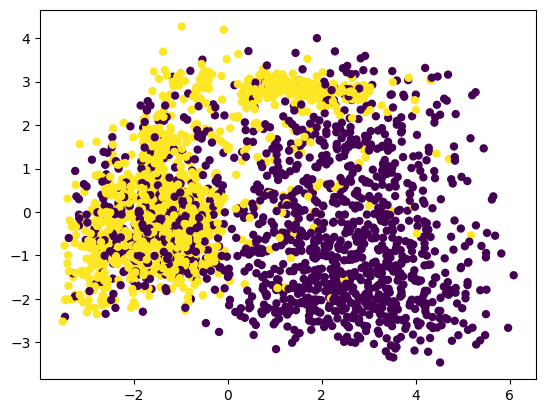

In [27]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label.values, s=25);

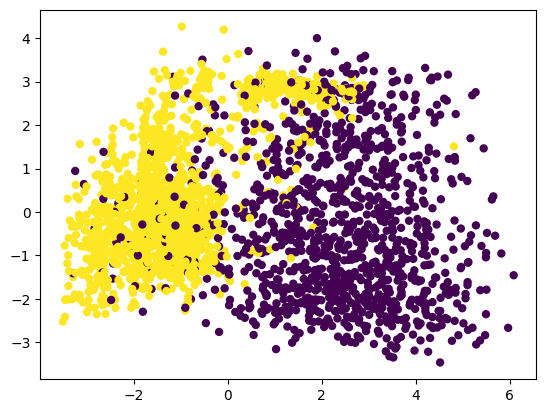

In [28]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred_gnb, s=25);

### How lang is biased

In [29]:
# take a non bot user
non_bot_users = test_set[test_label==0]
total_bot = (test_label==0).sum()

In [30]:
test_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
2351877541,1550763546,80,61.385093,13.335404,0.0,0.285714,0.086957,0.0,0.0,0.037267,0.189416,0.229618,0.012422,0.110761,4
2368601821,1551690626,55,63.058333,13.633333,0.0,0.350000,0.100000,0.0,0.0,0.091667,0.288555,0.442009,0.033333,0.179505,4
1174651890,1518688515,53,60.000000,13.259259,0.0,0.000000,0.111111,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4
2382845922,1552434595,45,67.476636,15.018692,0.0,0.373832,0.056075,0.0,0.0,0.084112,0.309401,0.424104,0.056075,0.230066,4
2384449256,1552526127,43,66.396040,14.970297,0.0,0.386139,0.099010,0.0,0.0,0.039604,0.195027,0.240473,0.029703,0.220506,4


In [31]:
non_bot_users_X = scaler.transform(non_bot_users.values)

In [32]:
gnb.predict(non_bot_users_X).sum()/total_bot

0.30407911001236093

In [33]:
for lang in data.lang_num.unique():
    # substitute lang_num with 9 (italian), all the italian are bots
    modified_non_bot_users = non_bot_users.copy()
    modified_non_bot_users["lang_num"] = lang
    modified_non_bot_users.head()
    modified_non_bot_users_X = scaler.transform(modified_non_bot_users.values)
    print(f"number bot classified with lang_num = {lang} : {gnb.predict(modified_non_bot_users_X).sum()/total_bot}")

number bot classified with lang_num = 4 : 0.3022249690976514
number bot classified with lang_num = 9 : 0.30902348578491967
number bot classified with lang_num = 7 : 0.30407911001236093
number bot classified with lang_num = 15 : 0.31829419035846723
number bot classified with lang_num = 5 : 0.3022249690976514
number bot classified with lang_num = 17 : 0.32138442521631644
number bot classified with lang_num = 14 : 0.3158220024721879
number bot classified with lang_num = 12 : 0.3121137206427689
number bot classified with lang_num = 8 : 0.3065512978986403
number bot classified with lang_num = 18 : 0.3226205191594561
number bot classified with lang_num = 10 : 0.31025957972805934
number bot classified with lang_num = 2 : 0.3022249690976514
number bot classified with lang_num = 11 : 0.311495673671199
number bot classified with lang_num = 1 : 0.3034610630407911
number bot classified with lang_num = 0 : 0.3046971569839308
number bot classified with lang_num = 13 : 0.31334981458590855
number bot 

### Removed Lang attribute for classification

In [34]:
del train_set["lang_num"]

In [35]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2358350287,1551119188,60,74.449275,16.695652,0.0000,0.355072,0.079710,0.0,0.0,0.057971,0.262875,0.319480,0.043478,0.236814
2265569552,1546157115,53,84.550268,18.005949,0.0232,0.007733,0.066032,0.0,0.0,0.022606,0.152592,0.156531,0.326591,6.236166
2354994642,1550937268,81,60.191781,13.739726,0.0000,0.301370,0.095890,0.0,0.0,0.027397,0.200861,0.163375,0.034247,0.181862
2364784555,1551483115,56,61.890756,14.025210,0.0000,0.243697,0.016807,0.0,0.0,0.033613,0.222014,0.192920,0.016807,0.128547
228148311,1450647262,53,35.300000,14.694444,0.2000,0.100000,0.000000,0.0,0.3,0.100000,0.300000,0.468996,0.000000,0.000000


In [36]:
del test_set["lang_num"]

In [37]:
test_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2351877541,1550763546,80,61.385093,13.335404,0.0,0.285714,0.086957,0.0,0.0,0.037267,0.189416,0.229618,0.012422,0.110761
2368601821,1551690626,55,63.058333,13.633333,0.0,0.350000,0.100000,0.0,0.0,0.091667,0.288555,0.442009,0.033333,0.179505
1174651890,1518688515,53,60.000000,13.259259,0.0,0.000000,0.111111,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2382845922,1552434595,45,67.476636,15.018692,0.0,0.373832,0.056075,0.0,0.0,0.084112,0.309401,0.424104,0.056075,0.230066
2384449256,1552526127,43,66.396040,14.970297,0.0,0.386139,0.099010,0.0,0.0,0.039604,0.195027,0.240473,0.029703,0.220506


In [38]:
scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

In [39]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb2 = GaussianNB()
gnb2.fit(train_X, train_label)

#predict on the test set
train_pred_gnb = gnb2.predict(train_X)
test_pred_gnb = gnb2.predict(test_X)

In [40]:
print_metrics(train_label, train_pred_gnb, test_label, test_pred_gnb)

Accuracy train set  0.8382371198013656
Accuracy test set  0.8311613090066609
Precision train set  0.8492737614727038
Recall train set  0.8382371198013656
F1 score train set  0.8357384157241756
Support train set  (array([0.91087463, 0.7949683 ]), array([0.72575517, 0.9373978 ]), array([0.80784545, 0.86032801]), array([3774, 4281]))


In [41]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.92      0.70      0.79      1618
         >50       0.78      0.95      0.86      1835

    accuracy                           0.83      3453
   macro avg       0.85      0.82      0.83      3453
weighted avg       0.85      0.83      0.83      3453



In [42]:
# cross validation
scores = cross_validate(gnb, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.0030863285064697266
Score time  0.0014142990112304688
Test score  0.8378646803227808
Train score  0.8381750465549348


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


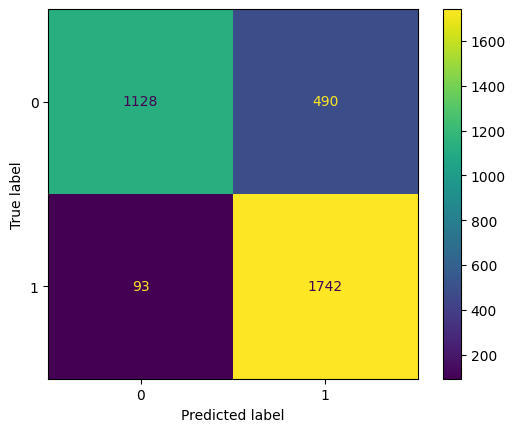

In [43]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred_gnb)
plot_confusion_matrix(gnb2, test_X, test_label)
plt.show() 

In [45]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_X)

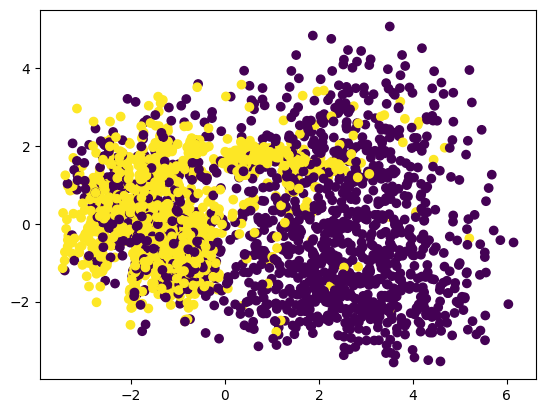

In [47]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label.values);

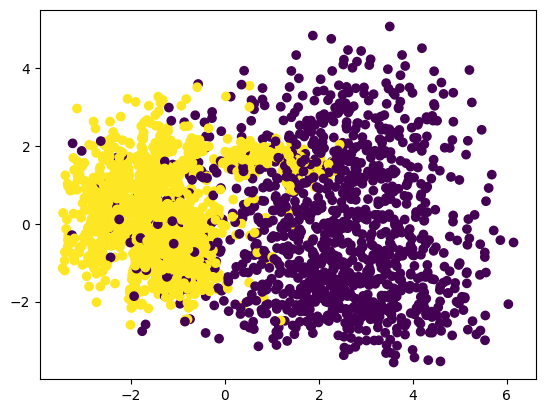

In [48]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred_gnb);